In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
from cloudstor import cloudstor
import stripy, lavavu
import PIL

In [2]:
res_lon = 1800
res_lat = 900
mesh = stripy.hybrid_st_meshes.warped_xy_mesh_sphere(res_lon=res_lon, res_lat=res_lat)


In [3]:
teaching_data = cloudstor(url="L93TxcmtLQzcfbk", password='')
glucifer_tex_maps = cloudstor(url="WRG3gSEpY3j9GEW", password='')

Cloudstore connection established
Cloudstore connection established


In [4]:
teaching_data.list("Mars")

['MarsTopo3600x1800.tif', 'Mars_MGS_MOLA_DEM_mosaic_global_463m.tif']

In [10]:
glucifer_tex_maps.download('VenusTopographyMap2000x1000.tif', 'VenusTopographyMap2000x1000.tif')
glucifer_tex_maps.download('VenusRadarBrightness_4096x2048.tif', 'VenusRadarBrightness_4096x2048.tif')
teaching_data.download('Venus/VenusTopo3600x1800.tif', 'VenusTopo3600x1800.tif')
teaching_data.download('Mars/MarsTopo3600x1800.tif', 'MarsTopo3600x1800.tif')
teaching_data.download('Moon/MoonTopo3600x1800.tif', 'MoonTopo3600x1800.tif')

                                            

KeyboardInterrupt: 

## Mars viewer



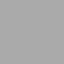

In [13]:
topography_data = np.array(imageio.imread("MarsTopo3600x1800.tif"))

height = np.array(PIL.Image.fromarray(topography_data.view()).resize((res_lon,res_lat))).astype(float)
hrange = height.max()-height.min()
height0 = (height - height.min()) / hrange 


XX = mesh.XX
YY = mesh.YY
ZZ = mesh.ZZ

lv1 = lavavu.Viewer(border=False, resolution=[1066,666], background="#FFFFFF")
lv1["axis"]=False
lv1['specular'] = 0.1

shrink_surface = 1.0  + 0.05 * height0.reshape(-1)

tris1 = lv1.triangles("surfacemap",  wireframe=False, colour="#000000:0.0")
tris1.vertices([XX*shrink_surface, YY*shrink_surface, ZZ*shrink_surface])
tris1.indices(mesh.simplices)
tris1.texcoords([mesh.SS,mesh.TT])

from matplotlib import cm
from matplotlib.colors import Normalize

terrain_norm = Normalize(vmin=-5000.0, vmax=10000.0)
texdata = cm.terrain(terrain_norm(topography_data))
tris1.texture(texdata, flip=False)

lv1.window(menu=False)


## Moon Viewer


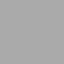

In [7]:
topography_data = np.array(imageio.imread("MoonTopo3600x1800.tif"))

height = np.array(PIL.Image.fromarray(topography_data.view()).resize((res_lon,res_lat))).astype(float)
hrange = height.max()-height.min()
height0 = (height - height.min()) / hrange 


XX = mesh.XX
YY = mesh.YY
ZZ = mesh.ZZ

lv1 = lavavu.Viewer(border=False, resolution=[1066,666], background="#FFFFFF")
lv1["axis"]=False
lv1['specular'] = 0.1

shrink_surface = 1.0  + 0.05 * height0.reshape(-1)

tris1 = lv1.triangles("surfacemap",  wireframe=False, colour="#000000:0.0")
tris1.vertices([XX*shrink_surface, YY*shrink_surface, ZZ*shrink_surface])
tris1.indices(mesh.simplices)
tris1.texcoords([mesh.SS,mesh.TT])

from matplotlib import cm
from matplotlib.colors import Normalize

terrain_norm = Normalize(vmin=-5000.0, vmax=5000.0)
texdata = cm.terrain(terrain_norm(topography_data))
tris1.texture(texdata, flip=False)

lv1.window(menu=False)


## Venus viewer

In [8]:
topography_data = np.array(imageio.imread("VenusTopo3600x1800.tif"))

height = np.array(PIL.Image.fromarray(topography_data.view()).resize((res_lon,res_lat))).astype(float)
hrange = height.max()-height.min()
height0 = (height - height.min()) / hrange 

XX = mesh.XX
YY = mesh.YY
ZZ = mesh.ZZ

lv1 = lavavu.Viewer(border=False, resolution=[1066,666], background="#FFFFFF")
lv1["axis"]=False
lv1['specular'] = 0.1

shrink_surface = 1.0  + 0.05 * height0.reshape(-1)

tris1 = lv1.triangles("surfacemap",  wireframe=False, colour="#000000:0.0")
tris1.vertices([XX*shrink_surface, YY*shrink_surface, ZZ*shrink_surface])
tris1.indices(mesh.simplices)
tris1.texcoords([mesh.SS,mesh.TT])

from matplotlib import cm
from matplotlib.colors import Normalize

terrain_norm = Normalize(vmin=-3000.0, vmax=3000.0)
texdata = cm.terrain(terrain_norm(topography_data))
tris1.texture(texdata, flip=False)

lv1.control.Panel()
lv1.control.ObjectList()                 
lv1.control.show()

ValueError: not a TIFF file

In [ ]:
height.shape

This is the control code for switch between different properties — I don't think this works
for changing the texture map of a triangulation.

```python
lv.control.Panel()
lv.control.Range('specular', range=(0,1), step=0.1, value=0.4)
lv.control.Checkbox(property='axis')
lv.control.ObjectList()
tris.control.List(options=["original", "smoothed", "smoothed2", "smoothed3",
                   "delta_n", "delta_ns", 
                   "delta_n2", "delta_ns2", 
                   "delta_n3", "delta_ns3"], property="colourby", value="original", command="redraw")
lv.control.show()
```

In [9]:
topography_data = np.array(imageio.imread("VenusTopo3600x1800.tif"))

height = np.array(PIL.Image.fromarray(topography_data.view()).resize((res_lon,res_lat))).astype(float)
hrange = height.max()-height.min()
height0 = (height - height.min()) / hrange 


XX = mesh.XX
YY = mesh.YY
ZZ = mesh.ZZ

lv1 = lavavu.Viewer(border=False, resolution=[1066,666], background="#FFFFFF")
lv1["axis"]=False
lv1['specular'] = 0.1

shrink_surface = 1.0  + 0.2 * height0.reshape(-1)

tris1 = lv1.triangles("surface_height",  wireframe=False, colour="#000000:0.0")
tris1.vertices([XX*shrink_surface, YY*shrink_surface, ZZ*shrink_surface])
tris1.indices(mesh.simplices)
tris1.texcoords([mesh.SS,mesh.TT])

from matplotlib import cm
from matplotlib.colors import Normalize

terrain_norm = Normalize(vmin=-3000.0, vmax=3000.0)
texdata = cm.terrain(terrain_norm(topography_data))
tris1.texture(texdata, flip=False)



tris2 = lv1.triangles("surface_radar",  wireframe=False, colour="#000000:0.0")
tris2.vertices([XX*shrink_surface, YY*shrink_surface, ZZ*shrink_surface])
tris2.indices(mesh.simplices)
tris2.texcoords([mesh.SS,mesh.TT])

texdata = imageio.imread("VenusRadarBrightness_4096x2048.tiff")
tris2.texture(texdata, flip=False)

lv1.control.Panel()
lv1.control.ObjectList()                 
lv1.control.show()

ValueError: not a TIFF file